In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import cnn_tensorflow as cnntf
import matplotlib.pyplot as plt

In [2]:
Train = sio.loadmat('train_32x32.mat')
Test = sio.loadmat('test_32x32.mat')

In [3]:
def reshape(X):
    out = list()
    X = X.T
    for i in range(X.shape[0]):
        out.append(X[i].T)
    return np.array(out)

In [4]:
X_train = reshape(Train['X']) #tensorflow format for input (N,H,W,C)
y_train = Train['y'].reshape(-1)
X_test = reshape(Test['X']) #tensorflow format for input (N,H,W,C)
y_test = Test['y'].reshape(-1)

Bellow we plot some of the images belonging to the SVHN (Street View House Numbers) dataset:

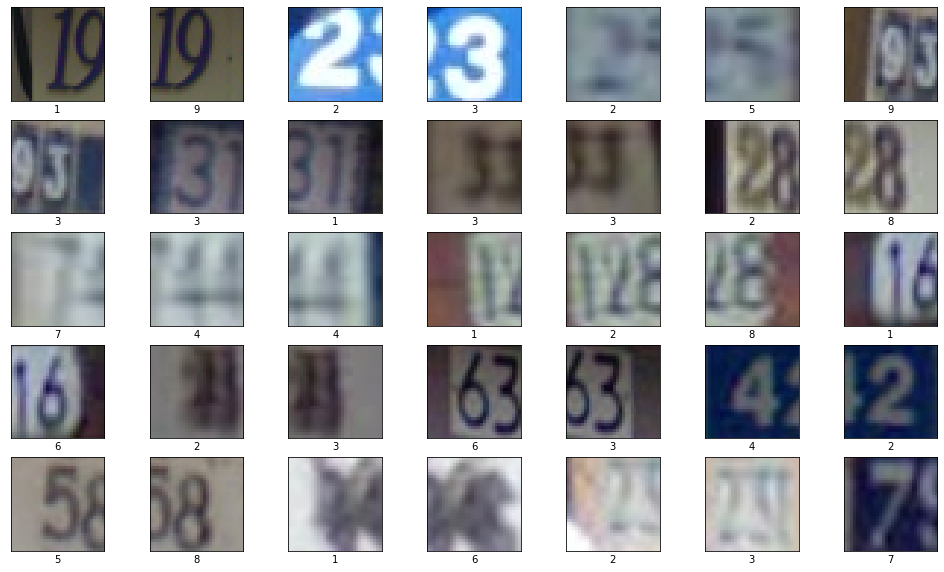

In [5]:
plt.figure(figsize=(17,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
cnn = cnntf.CNNClassifier(convpool_layers_sizes=[20,50], #feature maps of each layer
                    hidden_layers_sizes=[1600], #dense layer sizes
                         dropout_rates=[0.8,1], 
                         activation='relu',
                         num_epochs=50,
                         print_epoch=1,
                         learning_rate=1e-5,
                         gd_type='batch',
                         batch_number=20,
                         eps=1e-8, 
                         mu=0.9, #momentum
                         decay=0.99) #RMSProp decay
cnn.fit(X_train, y_train, X_test, y_test)

epoch: 0 cost: 35.314 accuracy: 0.139 cost_test: 35.442 accuracy_test: 0.149


In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

#logloss
ax1.plot(list(range(len(cnn.costs))),cnn.costs)
ax1.plot(cnn.costs_test)
ax1.set_title('Cost')
ax1.legend(['train','test'])
ax1.set_ylabel('logloss cost')
ax1.set_xlabel('iteration')

#accuracy
ax2.plot(cnn.clf_rates)
ax2.plot(cnn.clf_rates_test)
ax2.legend(['train','test'])
ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('iteration')
plt.show()